In [30]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [31]:
housedata = pd.read_csv('train.csv')
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
print("Data type : ", type(housedata))
print("Data dims : ", housedata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1460, 81)


In [33]:
# Count Plot for CentralAir
sb.catplot(y = "CentralAir", data = housedata, kind = "count")

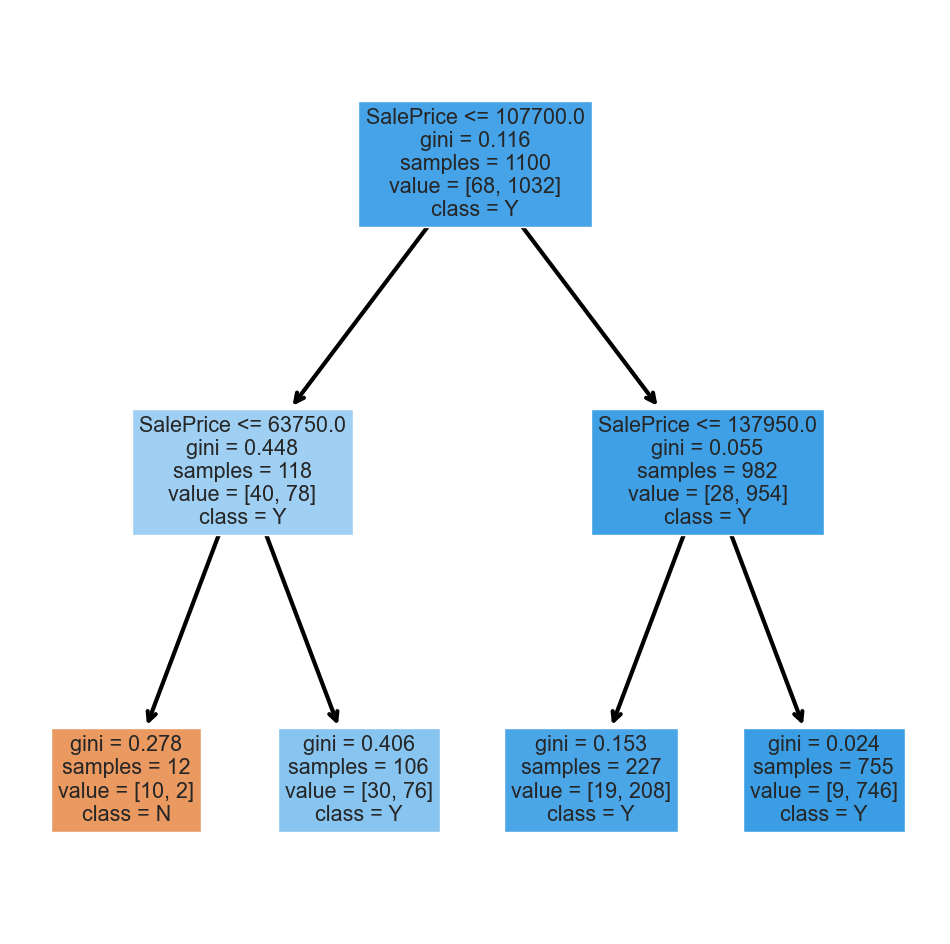

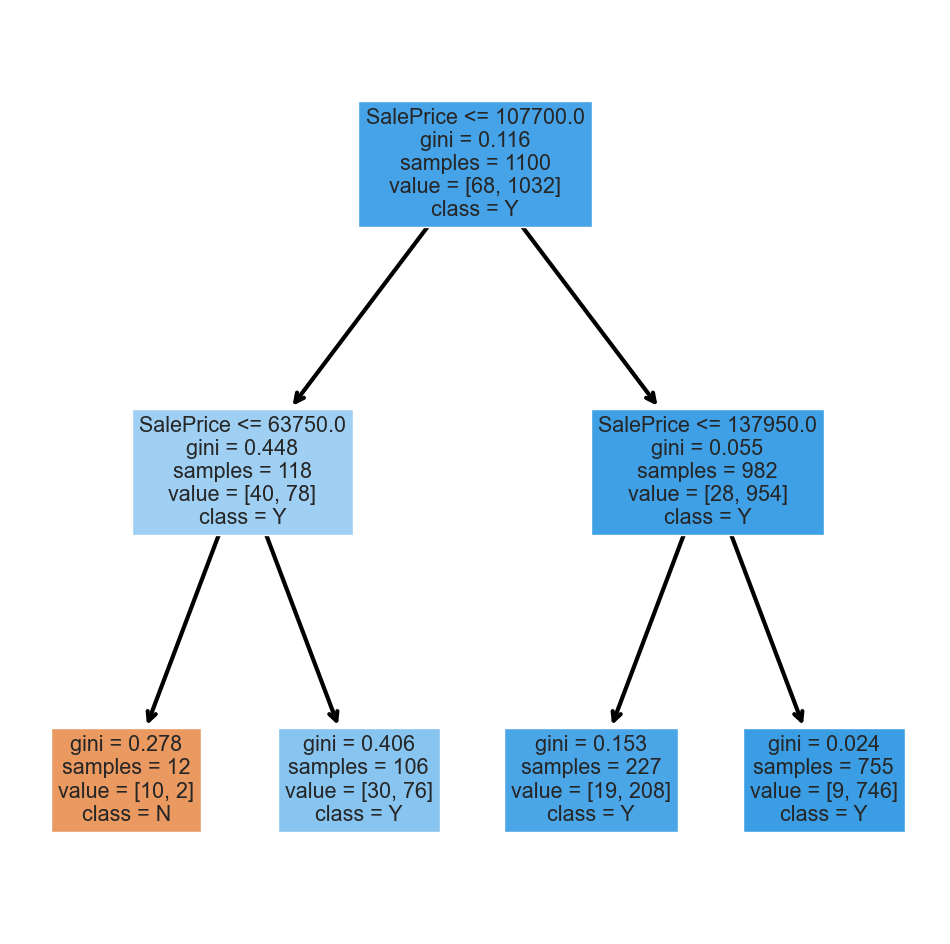

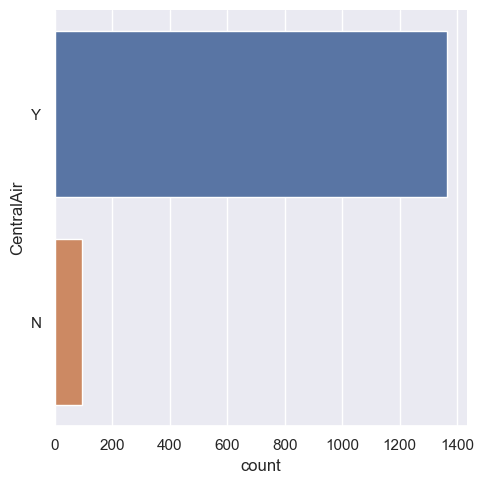

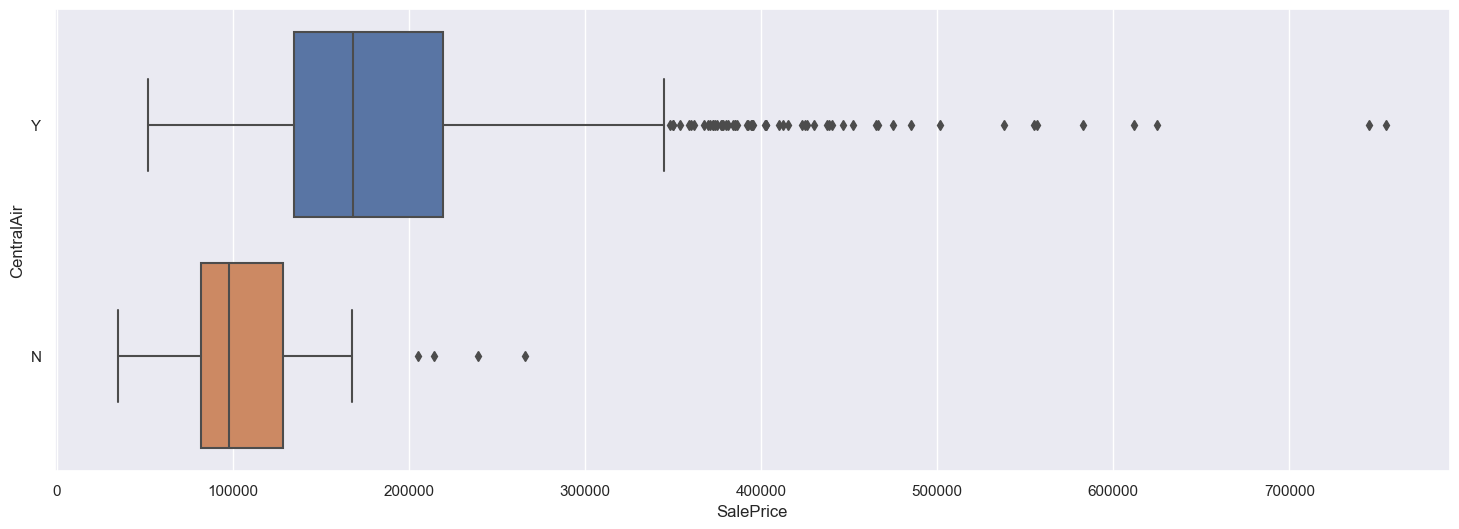

In [34]:
# Plotting CentralAir against SalePrice in boxplot
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = housedata, orient = "h")
plt.show()

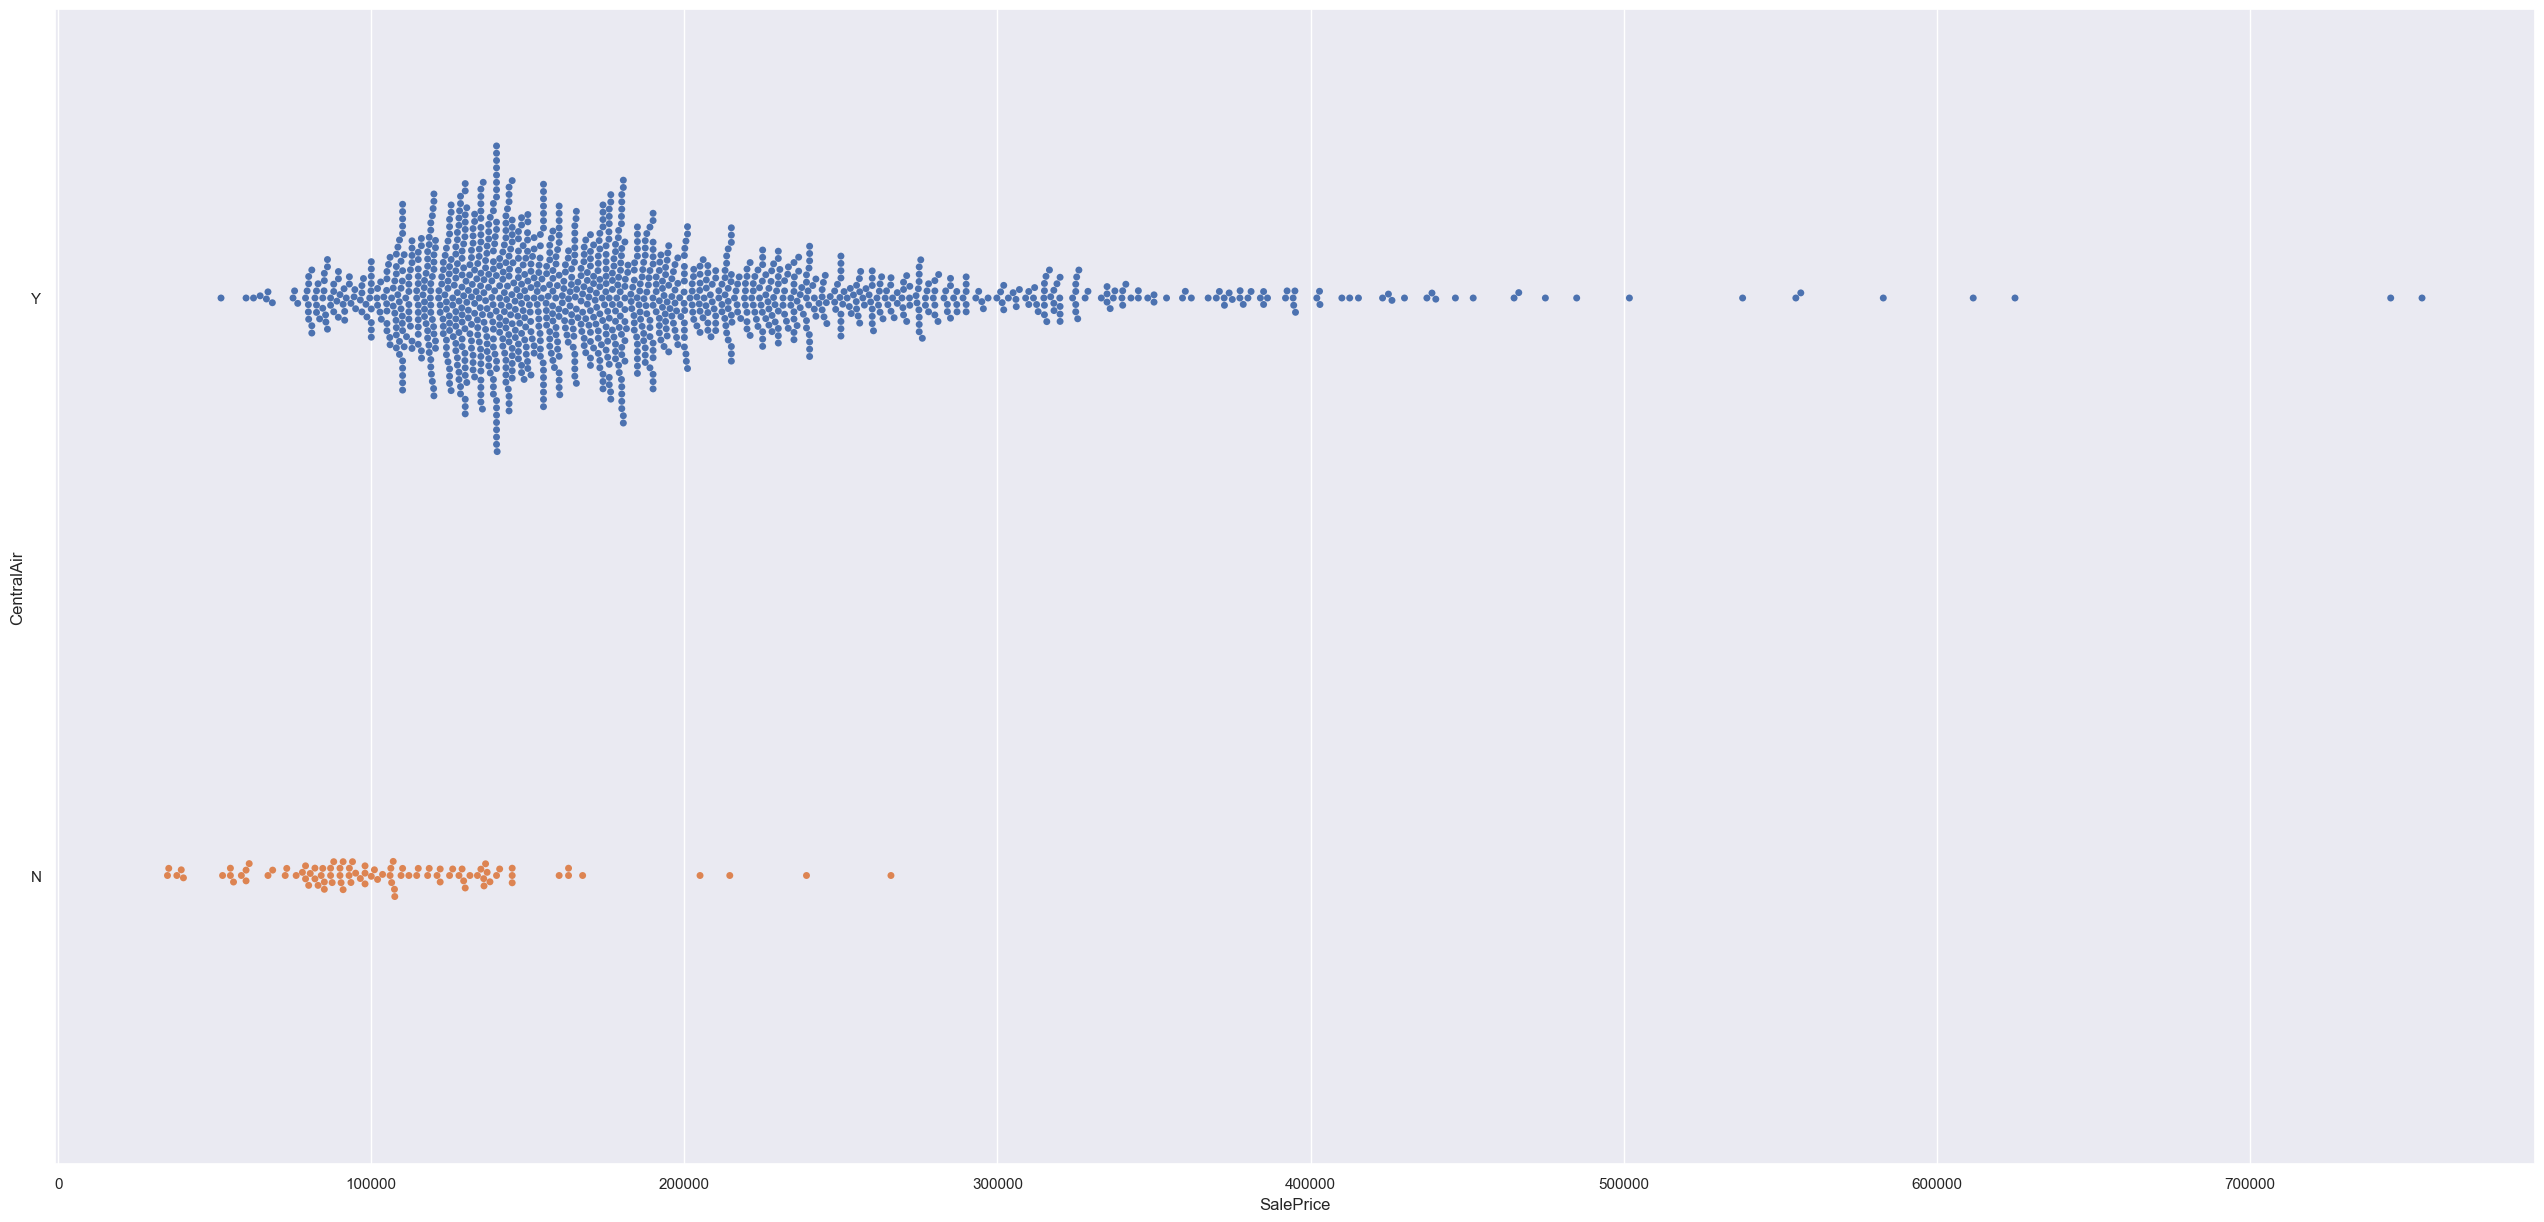

In [35]:
# Plotting CentralAir against Saleprice in swarmplot
f = plt.figure(figsize=(32, 15))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = housedata, orient = "h")
plt.show()

In [36]:
# Import train_test_split for splitting of data
from sklearn.model_selection import train_test_split

housedata_train, housedata_test = train_test_split(housedata, random_state = None, test_size = 360/1460)
print("Train Set: ", housedata_train.shape)
print("Test Set: ", housedata_test.shape)

Train Set:  (1100, 81)
Test Set:  (360, 81)


In [52]:
y_train = pd.DataFrame(housedata_train['CentralAir'])
X_train = pd.DataFrame(housedata_train['SalePrice'])

Train the Decision Tree Classifier model `dectree` using the Train Set.   
Use `total_train` as *Predictor* and `legnd_train` as *Response*.

In [38]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [42]:
# Train the Decision Tree Classifier Model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

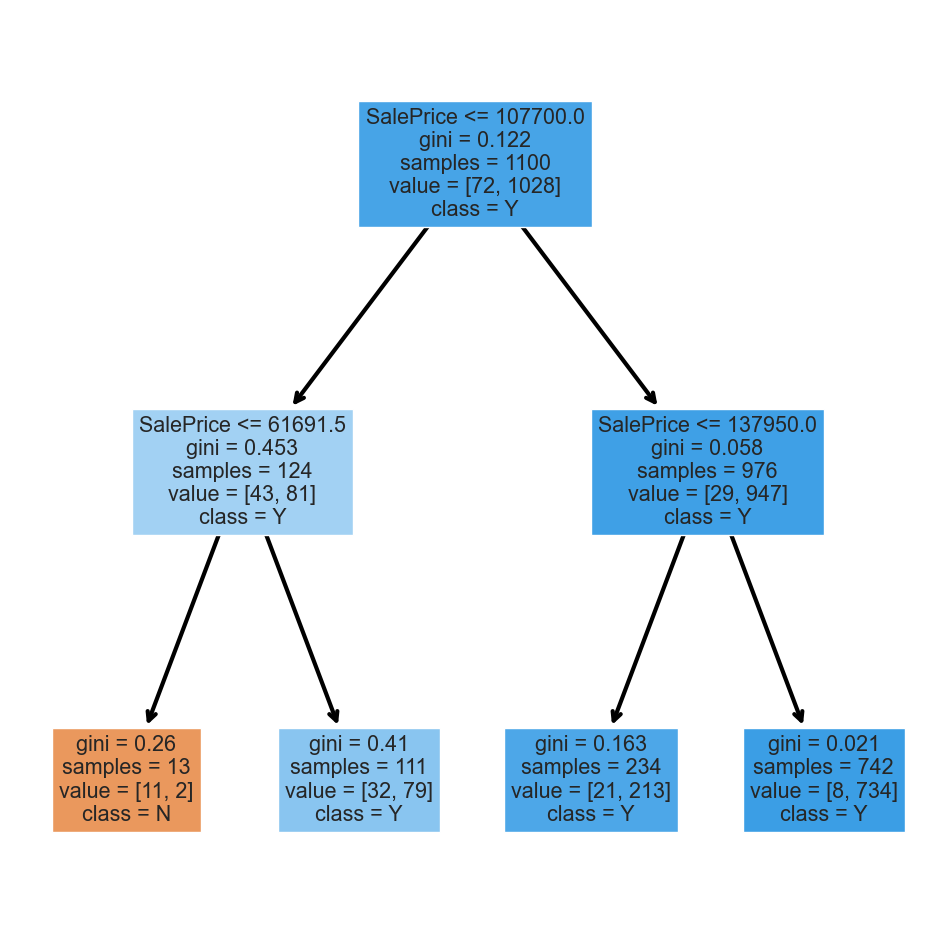

In [46]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree,
               feature_names = X_train.columns,
               class_names = [str(x) for x in dectree.classes_],
               filled = True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.9427272727272727


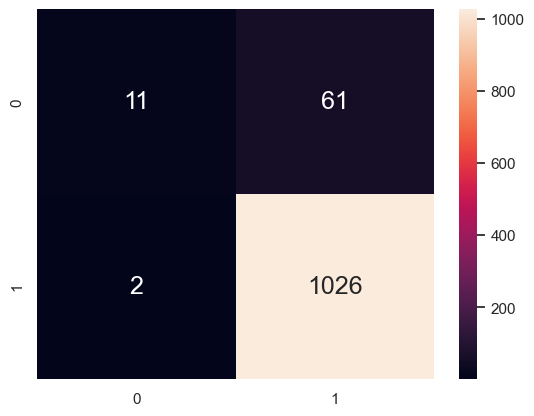

In [47]:
# Predict CentralAir_train to SalePrice_train
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

plt.show()

In [53]:
y_test = pd.DataFrame(housedata_test['CentralAir'])
X_test = pd.DataFrame(housedata_test['SalePrice'])

Classification Accuracy 	: 0.9416666666666667


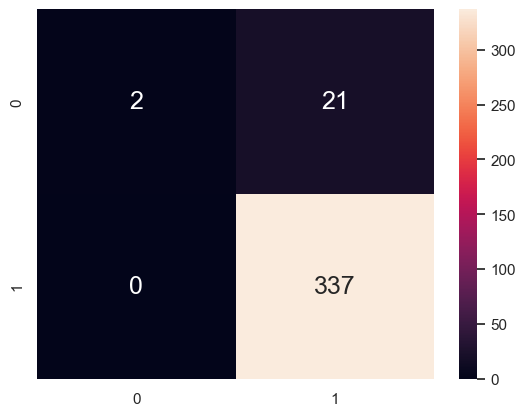

In [54]:
# Predict CentralAir_test to SalePrice_test
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

plt.show()